## 特殊方法

自定义数据类型可以通过实现特殊方法，更加方便。
- 只要通过 func(xx) 调用，不需要感知对象是什么(比如xx.func())
- 可以方便直接使用标准库函数，不需要自己实现。 

In [4]:
import collections

Card = collections.namedtuple('Card', ['rank', 'suit']) 

class FrenchDeck:
    ranks = [ str(n) for n in range(2, 11)] + list('JQKA')
    suits = 'spades diamonds clubs hearts'.split() # 花色



    def __init__(self):
        self._cards = [Card(rank, suit) for suit in self.suits for rank in self.ranks]
    def __len__(self):
        return len(self._cards)
    def __getitem__(self, position):
        return self._cards[position]

`namedtuple` 创建一个只有类属性，没有类方法的简单类。

In [8]:
deck = FrenchDeck()
print(len(deck))
print(deck[2])
print(deck[-1])

52
Card(rank='4', suit='spades')
Card(rank='A', suit='hearts')


👍 此时，我们可以直接通过random choice 抽取。 因为__getitem__的操作给了列表，所以支持 slicing切片、可迭代、in

In [10]:
from random import choice
choice(deck)

Card(rank='J', suit='clubs')

In [11]:
deck[:3]

[Card(rank='2', suit='spades'),
 Card(rank='3', suit='spades'),
 Card(rank='4', suit='spades')]

In [13]:
for c in deck:
    print(c)
for c in reversed(deck):
    print(c)

Card(rank='2', suit='spades')
Card(rank='3', suit='spades')
Card(rank='4', suit='spades')
Card(rank='5', suit='spades')
Card(rank='6', suit='spades')
Card(rank='7', suit='spades')
Card(rank='8', suit='spades')
Card(rank='9', suit='spades')
Card(rank='10', suit='spades')
Card(rank='J', suit='spades')
Card(rank='Q', suit='spades')
Card(rank='K', suit='spades')
Card(rank='A', suit='spades')
Card(rank='2', suit='diamonds')
Card(rank='3', suit='diamonds')
Card(rank='4', suit='diamonds')
Card(rank='5', suit='diamonds')
Card(rank='6', suit='diamonds')
Card(rank='7', suit='diamonds')
Card(rank='8', suit='diamonds')
Card(rank='9', suit='diamonds')
Card(rank='10', suit='diamonds')
Card(rank='J', suit='diamonds')
Card(rank='Q', suit='diamonds')
Card(rank='K', suit='diamonds')
Card(rank='A', suit='diamonds')
Card(rank='2', suit='clubs')
Card(rank='3', suit='clubs')
Card(rank='4', suit='clubs')
Card(rank='5', suit='clubs')
Card(rank='6', suit='clubs')
Card(rank='7', suit='clubs')
Card(rank='8', sui

In [14]:
Card(rank='2', suit='spades') in deck

True

😊 支持sorted排序



In [15]:
suit_values = dict(spades = 3, hearts = 2, diamonds = 1, clubs = 0)
def asc(card):
    rank_value = FrenchDeck.ranks.index(card.rank)
    return rank_value * len(suit_values) + suit_values[card.suit]
for c in sorted(deck, key = asc):
    print(c)

Card(rank='2', suit='clubs')
Card(rank='2', suit='diamonds')
Card(rank='2', suit='hearts')
Card(rank='2', suit='spades')
Card(rank='3', suit='clubs')
Card(rank='3', suit='diamonds')
Card(rank='3', suit='hearts')
Card(rank='3', suit='spades')
Card(rank='4', suit='clubs')
Card(rank='4', suit='diamonds')
Card(rank='4', suit='hearts')
Card(rank='4', suit='spades')
Card(rank='5', suit='clubs')
Card(rank='5', suit='diamonds')
Card(rank='5', suit='hearts')
Card(rank='5', suit='spades')
Card(rank='6', suit='clubs')
Card(rank='6', suit='diamonds')
Card(rank='6', suit='hearts')
Card(rank='6', suit='spades')
Card(rank='7', suit='clubs')
Card(rank='7', suit='diamonds')
Card(rank='7', suit='hearts')
Card(rank='7', suit='spades')
Card(rank='8', suit='clubs')
Card(rank='8', suit='diamonds')
Card(rank='8', suit='hearts')
Card(rank='8', suit='spades')
Card(rank='9', suit='clubs')
Card(rank='9', suit='diamonds')
Card(rank='9', suit='hearts')
Card(rank='9', suit='spades')
Card(rank='10', suit='clubs')
Ca

python解释器如何调用特殊方法？ 如len()
- 自定义类型：调用自己实现的__len__方法
- 内置类型：list, str, bytearray返回cpython对应对象的内存大小
特殊方法往往是隐式的， 如 for x in arr就是实现的`__iter__`

特殊方法实现运算符重载：

In [28]:
# 二维向量
from math import hypot
class Vector:
    def __init__(self, x = 0, y = 0):
        self.x = x
        self.y = y
    def __repr__(self):
        return 'Vector (%r, %r)' % (self.x, self.y)  # %r 格式化符号
    def __abs__(self):
        return hypot(self.x, self.y) # sqrt(x*x + y*y)
    def __add__(self, other):
        x = self.x + other.x
        y = self.y + other.y
        return Vector(x, y)
    def __mul__(self, scalar):
        return Vector(self.x * scalar, self.y * scalar)
    def __bool__(self):
        return bool(self.x or self.y)

In [23]:
Vector(1, 2) + Vector(1, 2)

Vector (2, 4)

In [24]:
Vector(1, 2) * 3

Vector (3, 6)

In [25]:
abs(Vector(1, 2))

2.23606797749979

repr内置函数，把对象用字符串形式表达。     
通过自实现的__repr__得到内容.如果没有实现该特殊方法， 就会是默认对象实例。    
返回结果用%r代替。

str函数，对用户友好。对应__str__.  print优先调用这个。

特殊方法列举：
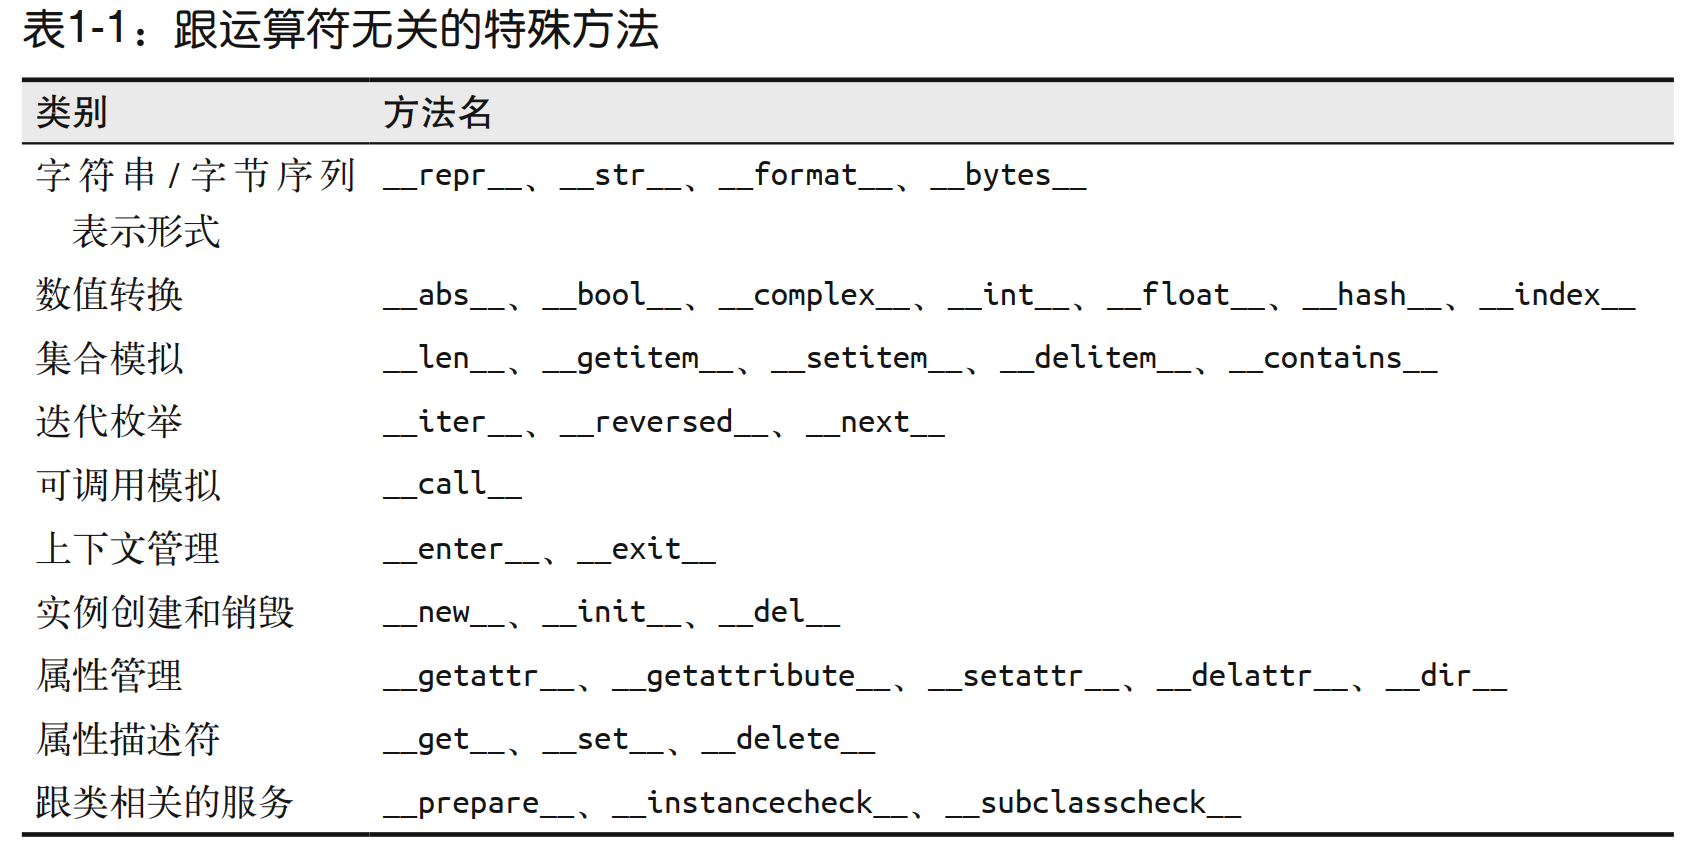
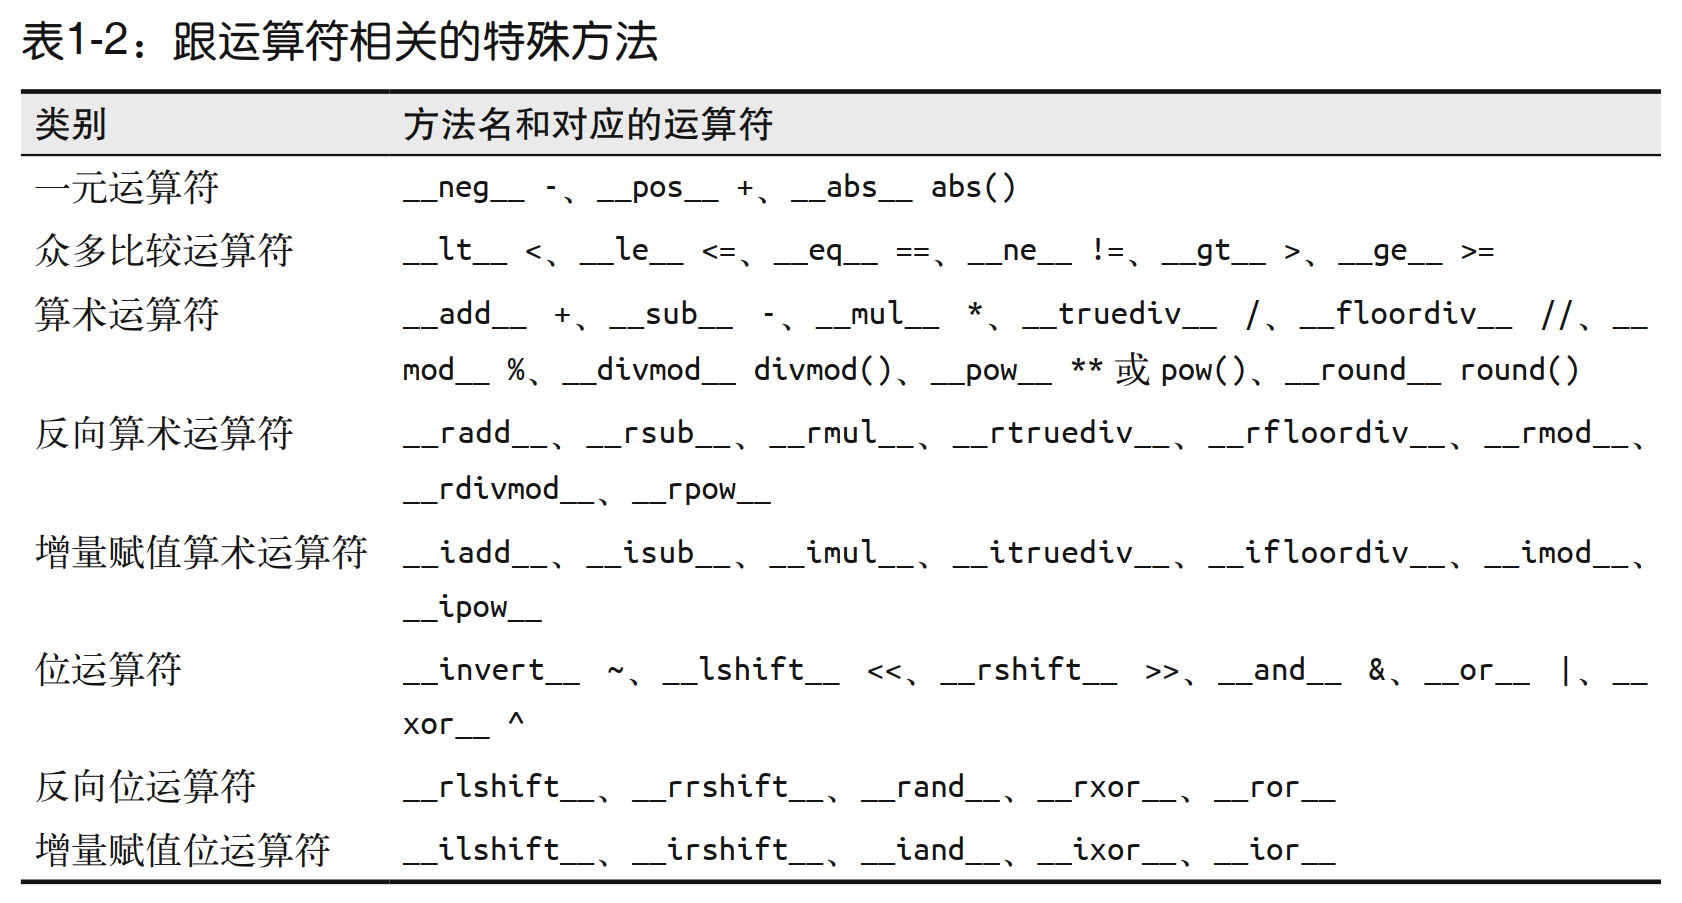  

## 序列类型: 通用的讨论
分类1:
- 容器序列：list, turple, collections.queue。 不同类型数据, 存放的是引用
- 扁平序列: str, bytes, bytearray, memoryview, array.array。 同一类型，存放的是值
分类2：
- 不可变序列：turple, str, bytes,
- 可变序列： list, collections.queue,  bytearray, memoryview, array.array





In [33]:
symbols = '$¢£¥€¤'
codes = [ord(symbol) for symbol in symbols]
codes

[36, 162, 163, 165, 8364, 164]

In [39]:
beyond_ascii = [ ord(symbol) for symbol in symbols if ord(symbol) > 127]
beyond_ascii

[162, 163, 165, 8364, 164]

In [44]:
beyond_ascii = list(filter(lambda symbol : symbol > 128, map(ord, symbols)))
beyond_ascii

[162, 163, 165, 8364, 164]

### 元组
1. 元组不仅仅是不可变列表，更是记录：结构化数据，每个位置都有固定含义
2. *拆包
3. `*`处理剩余元素： 如`*args`

In [4]:
name, usrid, score = ('dong', 1001, 100.2)
student_tables = [('dong', 1001, 100.2), ('zhang', 1003, 120.2), ('yyt', 1002, 30.2)]
print(student_tables)

[('dong', 1001, 100.2), ('zhang', 1003, 120.2), ('yyt', 1002, 30.2)]


In [5]:
student1 = ('zhang', 1003, 120.2)
print(*student1) # 拆包

zhang 1003 120.2


In [7]:
import os
path, filename = os.path.split('/home/dong/.viminfo')
print(path, filename)

/home/dong .viminfo


In [9]:
a,b,*rest = range(5)
print(rest)

[2, 3, 4]


In [10]:
a,*rest, b = range(10)
print(rest)

[1, 2, 3, 4, 5, 6, 7, 8]


可以看到， *可以出现在任意位置

#### nameturple 带字段名字的元组

🤷‍♂️ 元组可以记录，但是缺少字段名。 

In [18]:
from collections import namedtuple
City = namedtuple('City', ['name', 'country', 'population', 'coordinates'])
tokyo = City('Tokyo', 'JP', '35.33', (41.6666, 30.33333))
print(tokyo)
print(tokyo[1])

City(name='Tokyo', country='JP', population='35.33', coordinates=(41.6666, 30.33333))
JP


In [23]:
print(City._fields) # 字段

('name', 'country', 'population', 'coordinates')


In [26]:
for k,v in tokyo._asdict().items(): # 友好打印
    print(k,':', v)

name : Tokyo
country : JP
population : 35.33
coordinates : (41.6666, 30.33333)


### list.sort 和 内置 sorted
- `list.sort`原地修改
- 通常地，原地修改的都会返回None

bisect模块搜索

### 列表不是首选的情况
- 如存储大量浮点数，array更合适
- 如先进先出，deque双端队列更合适
- 如set不重复

`array.array` 除了列表方法， 还提供了快速文件方法

In [11]:
from array import array
from random import random
floats = array('d', (random() for i in range(10 ** 7))) # 1000万个随机浮点数

In [12]:
print(floats[-1])

0.5267145461568951


In [14]:
fp = open('floats.bin', 'wb')
floats.tofile(fp)
fp.close()

In [18]:
floats2 = array('d')
fp = open('floats.bin', 'rb')
floats2.fromfile(fp, 10**7)
fp.close()

In [19]:
print(floats2[-1])

0.5267145461568951


In [20]:
floats2 == floats

True

### 内存视图memoryview
